In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv("C:/Users/Admin/Downloads/bike_datset_day.csv")

In [4]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0.0,1.0,0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654.0,985
1,2,02-01-2011,1,0.0,1.0,0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670.0,801
2,3,03-01-2011,1,0.0,1.0,0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229.0,1349
3,4,04-01-2011,1,0.0,1.0,0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454.0,1562
4,5,05-01-2011,1,0.0,1.0,0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27-12-2012,1,1.0,12.0,0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,247,1867.0,2114
727,728,28-12-2012,1,1.0,12.0,0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,644,2451.0,3095
728,729,29-12-2012,1,1.0,12.0,0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,159,1182.0,1341
729,730,30-12-2012,1,1.0,12.0,0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,364,1432.0,1796


In [5]:
df.shape

(731, 16)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,730.000000,728.000000,731.000000,729.000000,730.000000,731.000000,729.000000,730.000000,730.000000,731.000000,731.000000,730.000000,731.000000
mean,366.000000,2.496580,0.501370,6.516484,0.028728,2.994513,0.684932,1.395349,0.495111,0.474784,0.628044,0.190486,848.176471,3659.308219,4504.348837
std,211.165812,1.110807,0.500341,3.454519,0.167155,2.006849,0.464862,0.544894,0.183219,0.162657,0.142469,0.077498,686.622488,1559.019285,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336667,0.338045,0.520521,0.134950,315.500000,2502.250000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.487364,0.627083,0.180975,713.000000,3664.500000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.608916,0.730313,0.233214,1096.000000,4783.250000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
df.dtypes

instant         int64
dteday         object
season          int64
yr            float64
mnth          float64
holiday         int64
weekday       float64
workingday    float64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered    float64
cnt             int64
dtype: object

In [8]:
df.isna()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            1
mnth          3
holiday       0
weekday       2
workingday    1
weathersit    0
temp          2
atemp         1
hum           1
windspeed     0
casual        0
registered    1
cnt           0
dtype: int64

In [13]:
df[df==0].count()

instant         0
dteday          0
season          0
yr            364
mnth            0
holiday       710
weekday       105
workingday    230
weathersit      0
temp            0
atemp           0
hum             1
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

In [15]:
df.mean(numeric_only=True)


instant        366.000000
season           2.496580
yr               0.501370
mnth             6.516484
holiday          0.028728
weekday          2.994513
workingday       0.684932
weathersit       1.395349
temp             0.495111
atemp            0.474784
hum              0.628044
windspeed        0.190486
casual         848.176471
registered    3659.308219
cnt           4504.348837
dtype: float64

In [16]:
df.fillna(df.mean(numeric_only=True),inplace=True)

In [17]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

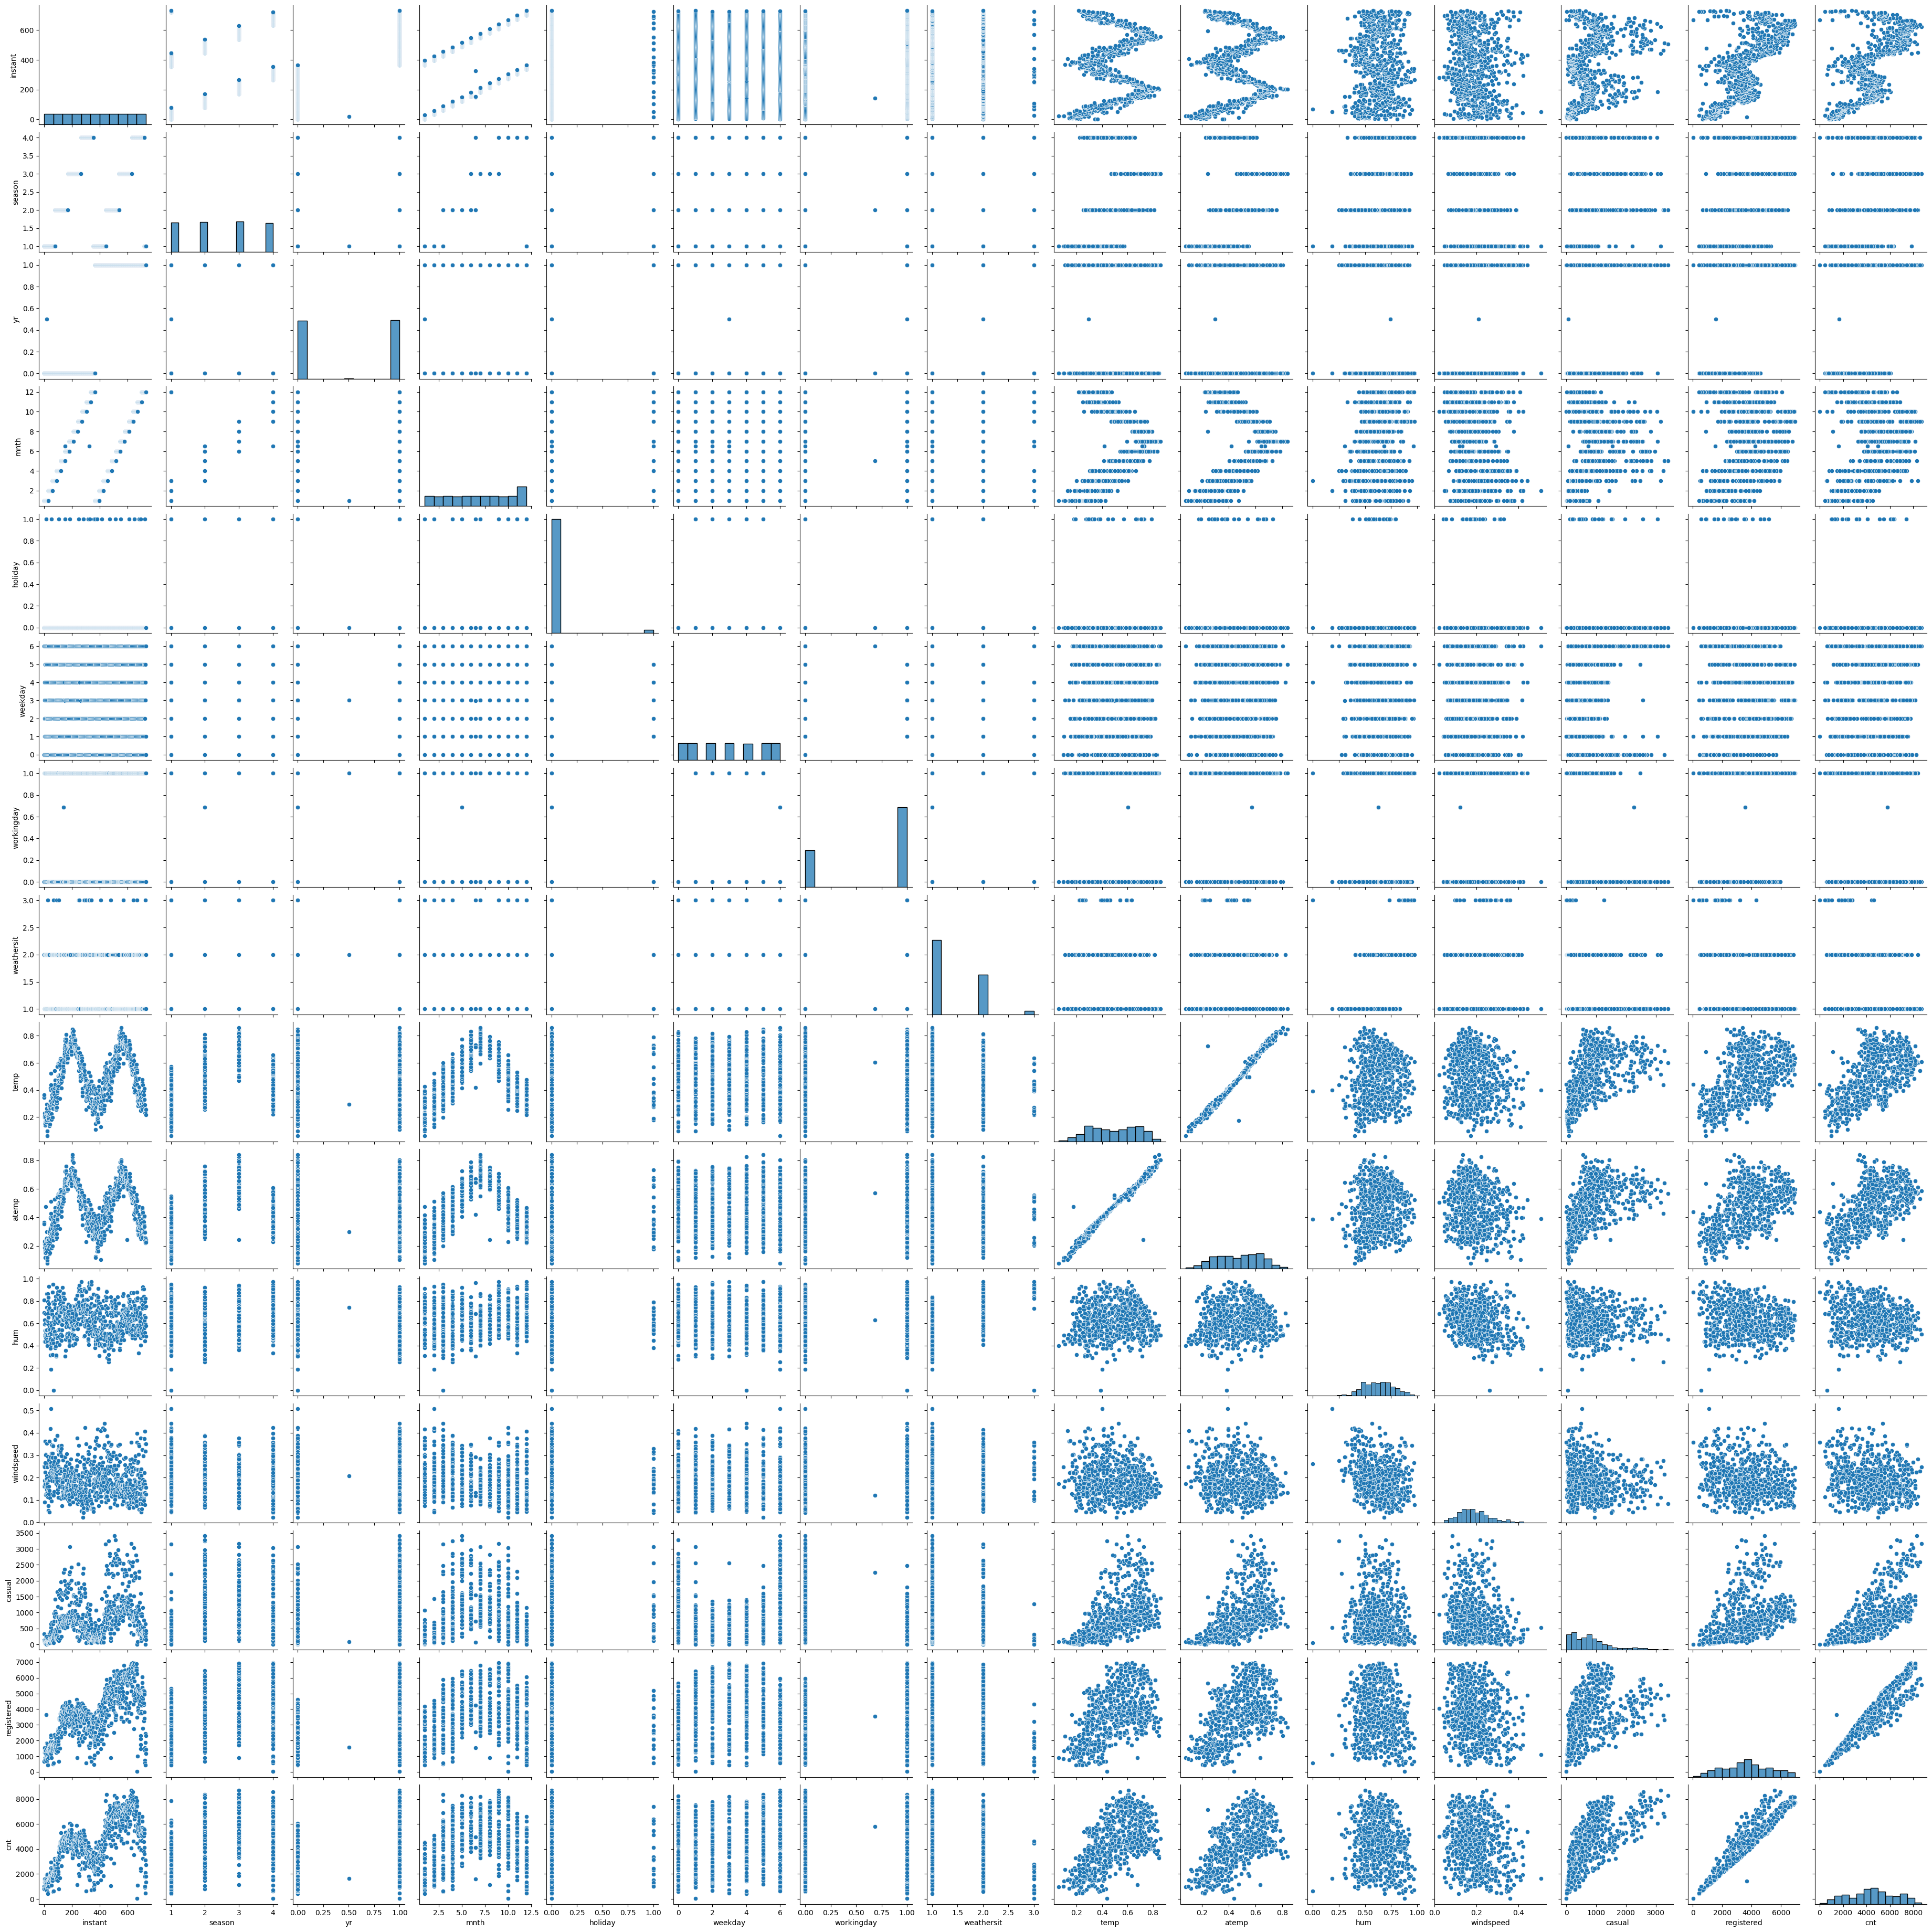

In [18]:
sns.pairplot(df)

In [19]:
part1=df.iloc[:100,:]
part1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0.0,1.0,0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654.0,985
1,2,02-01-2011,1,0.0,1.0,0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670.0,801
2,3,03-01-2011,1,0.0,1.0,0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229.0,1349
3,4,04-01-2011,1,0.0,1.0,0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454.0,1562
4,5,05-01-2011,1,0.0,1.0,0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,06-04-2011,2,0.0,4.0,0,3.0,1.0,1,0.390833,0.387608,0.470833,0.263063,413,2395.0,2808
96,97,07-04-2011,2,0.0,4.0,0,4.0,1.0,1,0.437500,0.433696,0.602917,0.162312,571,2570.0,3141
97,98,08-04-2011,2,0.0,4.0,0,5.0,1.0,2,0.335833,0.324479,0.836250,0.226992,172,1299.0,1471
98,99,09-04-2011,2,0.0,4.0,0,6.0,0.0,2,0.342500,0.341529,0.877500,0.133083,879,1576.0,2455


In [20]:
part2=df[(df["mnth"]==4)&(df["holiday"]==1)]
part2

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
104,105,15-04-2011,2,0.0,4.0,1,5.0,0.0,1,0.446667,0.441913,0.671250,0.226375,642,2484.0,3126
471,472,16-04-2012,2,1.0,4.0,1,1.0,0.0,1,0.664167,0.614925,0.561667,0.284829,1198,5172.0,6370


In [21]:
part3=df[(df["casual"]>140)&(df["registered"]<1000)]
part3

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0.0,1.0,0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654.0,985
15,16,16-01-2011,1,0.0,1.0,0,0.0,0.0,1,0.231667,0.234217,0.483750,0.188433,251,953.0,1204
22,23,23-01-2011,1,0.0,1.0,0,0.0,0.0,1,0.096522,0.098839,0.436522,0.246600,150,836.0,986
51,52,21-02-2011,1,0.0,2.0,1,1.0,0.0,2,0.303333,0.284075,0.605000,0.307846,195,912.0,1107
238,239,27-08-2011,3,0.0,8.0,0,6.0,0.0,2,0.680000,0.635556,0.850000,0.375617,226,889.0,1115
327,328,24-11-2011,4,0.0,11.0,1,4.0,0.0,1,0.373333,0.372471,0.549167,0.167304,560,935.0,1495
357,358,24-12-2011,1,0.0,12.0,0,6.0,0.0,1,0.302500,0.299242,0.542500,0.190304,155,856.0,1011
358,359,25-12-2011,1,0.0,12.0,0,0.0,0.0,1,0.274783,0.279961,0.681304,0.155091,303,451.0,754
359,360,26-12-2011,1,0.0,12.0,1,1.0,0.0,1,0.321739,0.315535,0.506957,0.239465,430,887.0,1317
723,724,24-12-2012,1,1.0,12.0,0,1.0,1.0,2,0.231304,0.258900,0.791304,0.077230,174,746.0,920


In [30]:
part1=df.iloc[10:150]
part1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10,11,11-01-2011,1,0.0,1.000000,0,2.0,1.0,2,0.169091,0.191464,0.686364,0.122132,43,1220.000000,1263
11,12,12-01-2011,1,0.0,1.000000,0,3.0,1.0,1,0.172727,0.474784,0.599545,0.304627,25,1137.000000,1162
12,13,13-01-2011,1,0.0,1.000000,0,4.0,1.0,1,0.165000,0.150883,0.470417,0.301000,38,1368.000000,1406
13,14,14-01-2011,1,0.0,1.000000,0,5.0,1.0,1,0.160870,0.188413,0.537826,0.126548,54,3659.308219,1421
14,15,15-01-2011,1,0.0,1.000000,0,6.0,0.0,2,0.233333,0.248112,0.498750,0.157963,222,1026.000000,1248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,26-05-2011,2,0.0,5.000000,0,4.0,1.0,1,0.708333,0.654688,0.677500,0.199642,758,3919.000000,4677
146,147,27-05-2011,2,0.0,5.000000,0,5.0,1.0,1,0.681667,0.637008,0.653750,0.240679,871,3808.000000,4679
147,148,28-05-2011,2,0.0,5.000000,0,6.0,0.0,1,0.655833,0.612379,0.729583,0.230092,2001,2757.000000,4758
148,149,29-05-2011,2,0.0,5.000000,0,0.0,0.0,1,0.667500,0.615550,0.818750,0.213938,2355,2433.000000,4788


In [23]:
X=df.iloc[:,-1]
Y=df.iloc[:,-1]

In [24]:
X

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [25]:
Y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [27]:

x_train,x_test,y_train,y_test = tts(X,Y,test_size=0.25,random_state=0)

In [29]:
x_train.shape

(548,)

In [31]:
y_train.shape

(548,)

In [32]:
x_test.shape

(183,)

In [33]:
y_test.shape

(183,)

In [34]:
x_train

452    5698
337    3485
509    6770
77     3117
451    5102
       ... 
707    5582
192    4258
629    8167
559    7499
684    5445
Name: cnt, Length: 548, dtype: int64